In [1]:
import pm4py
import pandas

from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.objects.log.obj import EventLog

# Step 1: Read and combine the two log files into one log
log_part_1 = xes_importer.apply("Road_Traffic_Fine_Management_Process_Data/Road_Traffic_Fine_Management_Process_Part1.xes")
log_part_2 = xes_importer.apply("Road_Traffic_Fine_Management_Process_Data/Road_Traffic_Fine_Management_Process_Part2.xes")
log = EventLog(list(log_part_1) + list(log_part_2))


parsing log, completed traces ::   0%|          | 0/75185 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/75185 [00:00<?, ?it/s]

In [4]:
# Step 2: Inspect the Loaded Log
print(f"Number of traces in the log: {len(log)}\n\n")
print(f"Details of the first log (log[0]):\n{log[0]}\n\n")
print(f"Details of the first event in the first log (log[0][0]):\n{log[0][0]}\n\n")
print(f"Starting activities and their count for all traces: \n{pm4py.get_start_activities(log)}\n\n")
end_activities = pm4py.get_end_activities(log)
print(f"End activities and their count for all traces: \n{end_activities}\n\n")
end_activities_counter = 0
iterations = 0
for key, value in end_activities.items():
     end_activities_counter += value
     iterations += 1
print(f'There is a total number of {iterations} end activities all activities end as the end activities are called {end_activities_counter} times which is the same number as the numbers of traces the log holds')

Number of traces in the log: 150370


Details of the first log (log[0]):
{'attributes': {'concept:name': 'A1'}, 'events': [{'amount': 35.0, 'org:resource': '561', 'dismissal': 'NIL', 'concept:name': 'Create Fine', 'vehicleClass': 'A', 'totalPaymentAmount': 0.0, 'lifecycle:transition': 'complete', 'time:timestamp': datetime.datetime(2006, 7, 24, 0, 0, tzinfo=datetime.timezone.utc), 'article': 157, 'points': 0}, '..', {'concept:name': 'Send Fine', 'lifecycle:transition': 'complete', 'expense': 11.0, 'time:timestamp': datetime.datetime(2006, 12, 5, 0, 0, tzinfo=datetime.timezone.utc)}]}


Details of the first event in the first log (log[0][0]):
{'amount': 35.0, 'org:resource': '561', 'dismissal': 'NIL', 'concept:name': 'Create Fine', 'vehicleClass': 'A', 'totalPaymentAmount': 0.0, 'lifecycle:transition': 'complete', 'time:timestamp': datetime.datetime(2006, 7, 24, 0, 0, tzinfo=datetime.timezone.utc), 'article': 157, 'points': 0}


Starting activities and their count for all traces: 
{'Cre

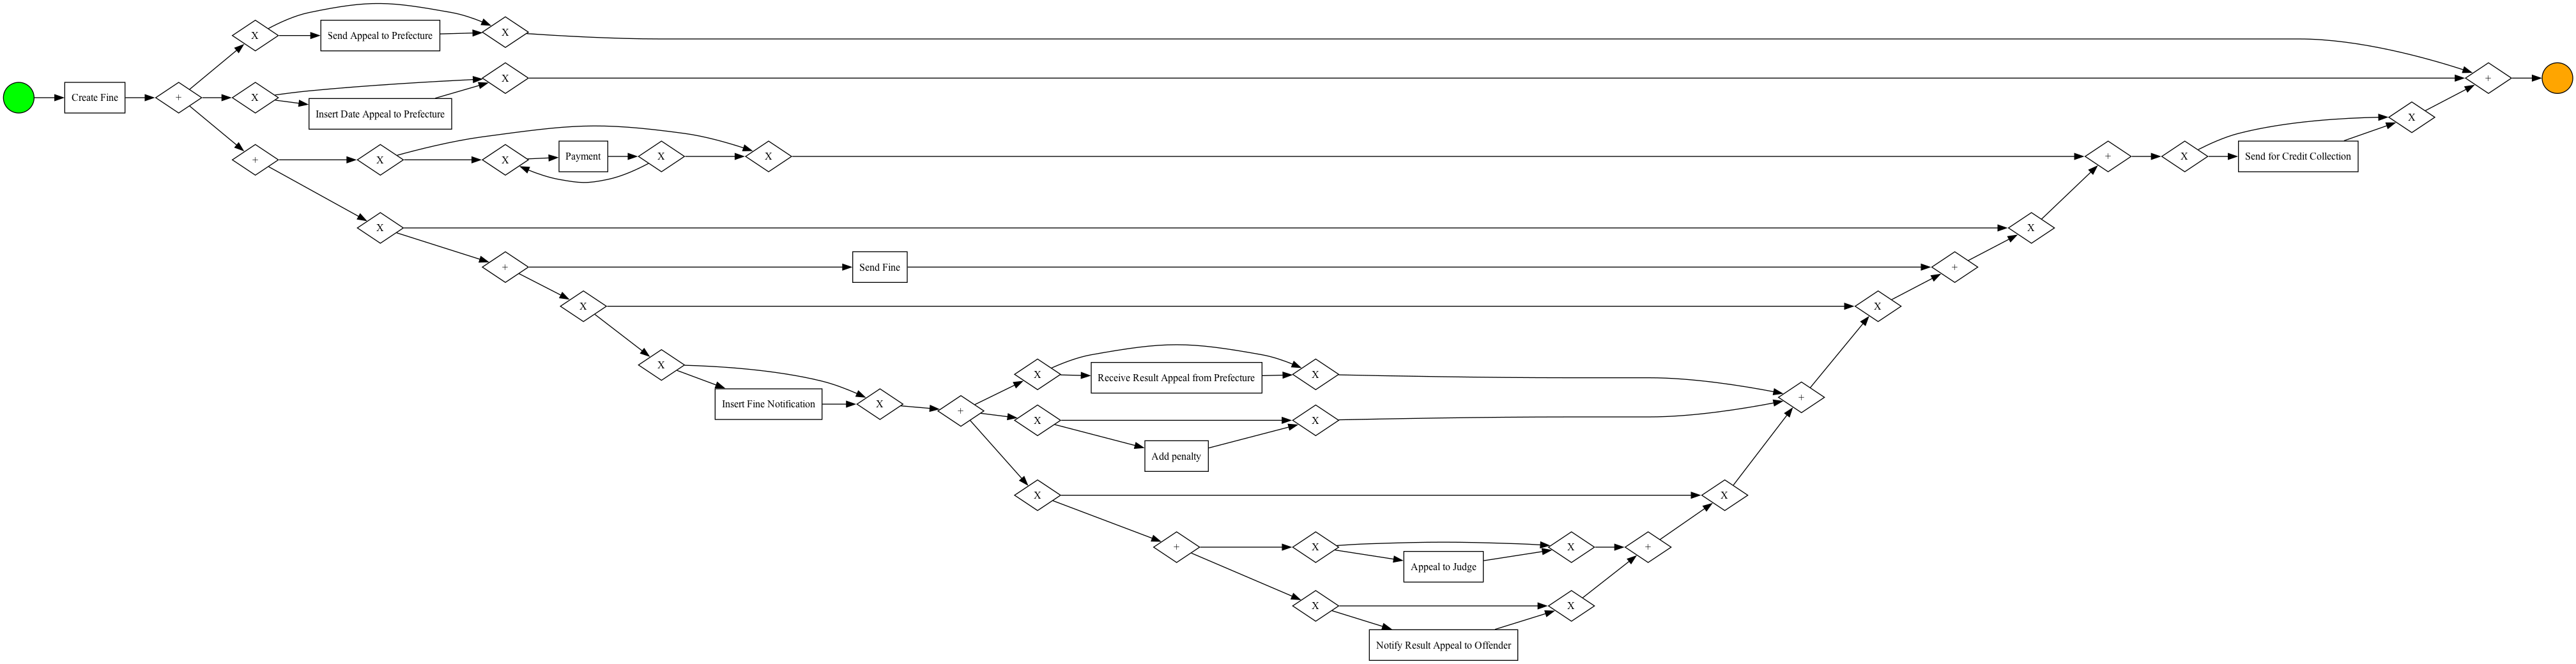

In [6]:
bpm_model = pm4py.discover_bpmn_inductive(log)
pm4py.view_bpmn(bpm_model)